In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from keras.models import Sequential
import matplotlib.patches as mpatches
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

Using TensorFlow backend.


In [4]:
df = pd.read_csv('WORKBOOKNEW.csv')
#df = pd.read_csv('1yearcomplete.csv')
#df.dropna()
#Index 10392 marks the end of October 2013 
import matplotlib.pyplot as plt 
input_feature= df.iloc[:,:].values
input_data = input_feature
from sklearn.preprocessing import MinMaxScaler
sc= MinMaxScaler(feature_range=(0,1))
input_data[:,0:2] = sc.fit_transform(input_feature[:,1:])
myDataset = pd.DataFrame(df['sales'])
Dataset = myDataset.values
Dataset = Dataset.astype('float32')
df.date= pd.to_datetime(df.date)
df.set_index('date', inplace=True)

#plt.xlabel('Year', fontsize=20)
dataset=df

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 245 entries, 2017-04-01 to 2017-12-29
Data columns (total 1 columns):
sales    245 non-null float64
dtypes: float64(1)
memory usage: 3.8 KB


/home/akhilesh/Junk/HousePricing/lib/python3.6/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


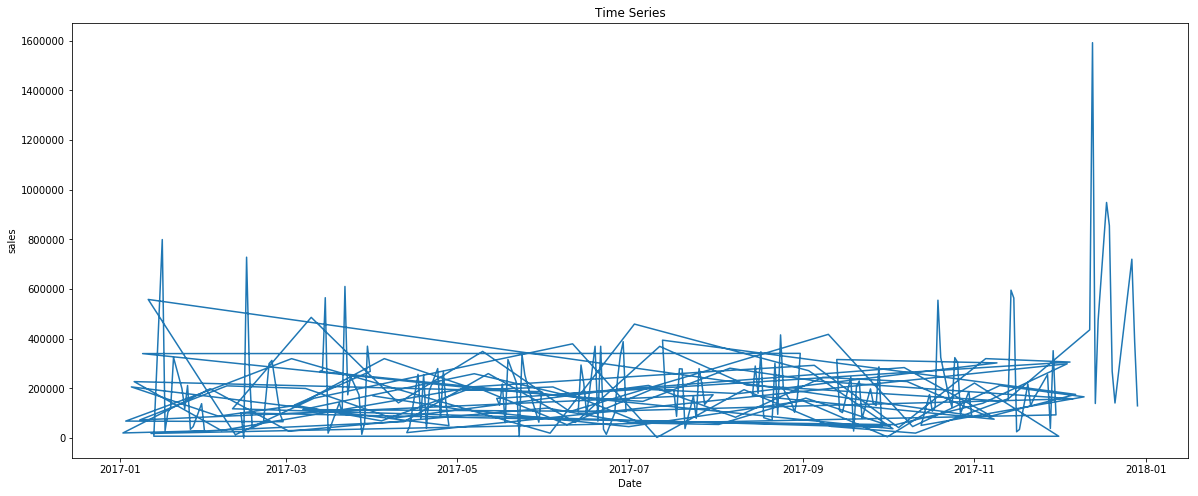

In [6]:
plt.figure(figsize=(20,8))
plt.plot(dataset)
plt.title('Time Series')
plt.xlabel('Date')
plt.ylabel('sales')
plt.show()

In [15]:
data=dataset
data=data.values
data = data.astype('float32')

In [16]:
scaler= MinMaxScaler(feature_range=(-1,1))
sc = scaler.fit_transform(data)

In [17]:
timestep = 30

X= []
Y=[]


for i in range(len(sc)- (timestep)):
    X.append(sc[i:i+timestep])
    Y.append(sc[i+timestep])


X=np.asanyarray(X)
Y=np.asanyarray(Y)

train_size = int(len(data) * 0.70)
k=train_size
test_size = len(data) - train_size
l=test_size
Xtrain = X[:k,:,:]
Xtest = X[k:,:,:]    
Ytrain = Y[:k]    
Ytest= Y[k:]   

print(Xtrain.shape)
print(Xtest.shape)

(11424, 30, 1)
(4867, 30, 1)


In [19]:
from keras.layers import Dense,RepeatVector
from keras.layers import Flatten
from keras.layers import TimeDistributed
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
model = Sequential()
model.add(Conv1D(filters=128, kernel_size=2, activation='relu', input_shape=(30,1)))
model.add(Conv1D(filters=64, kernel_size=2, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(RepeatVector(30))
model.add(LSTM(100, activation='sigmoid'))
model.add(Dense(50, activation='sigmoid'))
model.add(Dense(1))
model.compile(loss='mse', optimizer='adam')
model.fit(Xtrain,Ytrain,epochs=10, verbose=2 )

Epoch 1/10
 - 24s - loss: 0.0718
Epoch 2/10
 - 23s - loss: 0.0030
Epoch 3/10
 - 23s - loss: 0.0029
Epoch 4/10
 - 24s - loss: 0.0029
Epoch 5/10
 - 24s - loss: 0.0030
Epoch 6/10
 - 24s - loss: 0.0029
Epoch 7/10
 - 23s - loss: 0.0030
Epoch 8/10
 - 23s - loss: 0.0030
Epoch 9/10
 - 23s - loss: 0.0030
Epoch 10/10
 - 23s - loss: 0.0030


In [20]:
preds_cnn1 = model.predict(Xtest)
preds_cnn1 = scaler.inverse_transform(preds_cnn1)


Ytest=np.asanyarray(Ytest)  
Ytest=Ytest.reshape(-1,1) 
Ytest = scaler.inverse_transform(Ytest)


Ytrain=np.asanyarray(Ytrain)  
Ytrain=Ytrain.reshape(-1,1) 
Ytrain = scaler.inverse_transform(Ytrain)

mean_squared_error(Ytest,preds_cnn1)

13046719.0

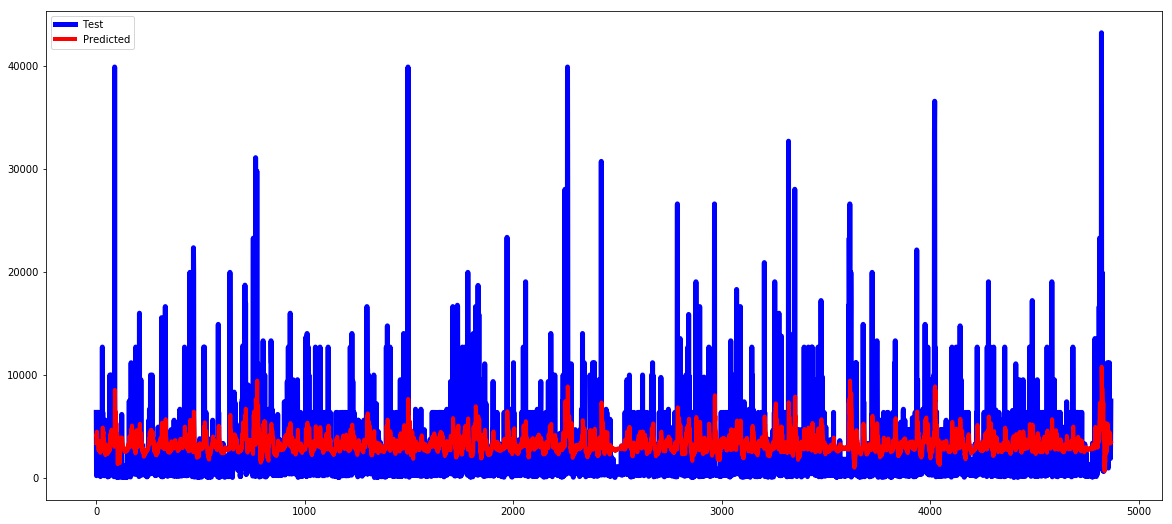

In [21]:
plt.figure(figsize=(20,9))
plt.plot(Ytest , 'blue', linewidth=5)
plt.plot(preds_cnn1,'r' , linewidth=4)
plt.legend(('Test','Predicted'))
plt.show()

Text(0, 0.5, 'Accuracy')

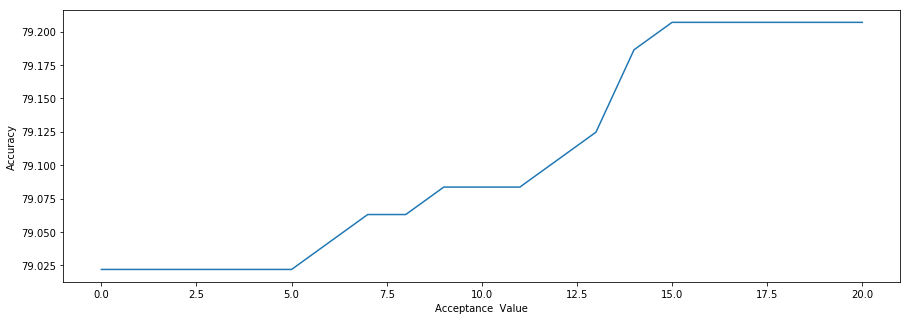

In [22]:
def myAccuracyTracker(predictions, truth, acceptance = 5):
    totals = len(predictions)
    wrongs = 0
    for i in range(totals):
        if abs(truth[i] - predictions[i] > acceptance):
            wrongs += 1
    return (totals-wrongs)/totals

accuracy_array = []
for acceptance in range(0, 21):
    accuracy_array.append(myAccuracyTracker(preds_cnn1, Ytest, acceptance) * 100)
accuracy_array = np.array(accuracy_array)

fig2 = plt.figure(figsize=(15,5))
plt.plot(accuracy_array)
plt.xlabel('Acceptance  Value')
plt.ylabel('Accuracy')

In [90]:
model.save("SAVEE.h5")
print("saved model")

saved model


In [2]:
from numpy import loadtxt
from keras.models import load_model

model=load_model('SAVEE.h5')
model.summary()

W0726 15:19:17.501811 139870224549696 deprecation_wrapper.py:119] From /home/akhilesh/Junk/HousePricing/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0726 15:19:18.579669 139870224549696 deprecation.py:323] From /home/akhilesh/Junk/HousePricing/lib/python3.6/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_13 (Conv1D)           (None, 29, 128)           384       
_________________________________________________________________
conv1d_14 (Conv1D)           (None, 28, 64)            16448     
_________________________________________________________________
max_pooling1d_7 (MaxPooling1 (None, 14, 64)            0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 896)               0         
_________________________________________________________________
repeat_vector_7 (RepeatVecto (None, 30, 896)           0         
_________________________________________________________________
lstm_7 (LSTM)                (None, 100)               398800    
_________________________________________________________________
dense_13 (Dense)             (None, 50)                5050      
__________

In [25]:
def insert_end(Xin,new_input):
    for i in range(timestep-1):
        Xin[:,i,:] = Xin[:,i+1,:]
    Xin[:,timestep-1,:] = new_input
    return Xin

In [26]:
first =0   # this section for unknown future 
future=170
forcast_cnn = []
Xin = Xtest[first:first+1,:,:]
for i in range(future):
    out = model.predict(Xin, batch_size=1)    
    forcast_cnn.append(out[0,0]) 
    Xin = insert_end(Xin,out[0,0]) 

In [27]:
forcasted_output_cnn=np.asanyarray(forcast_cnn)   
forcasted_output_cnn=forcasted_output_cnn.reshape(-1,1) 
forcasted_output_cnn = scaler.inverse_transform(forcasted_output_cnn) 

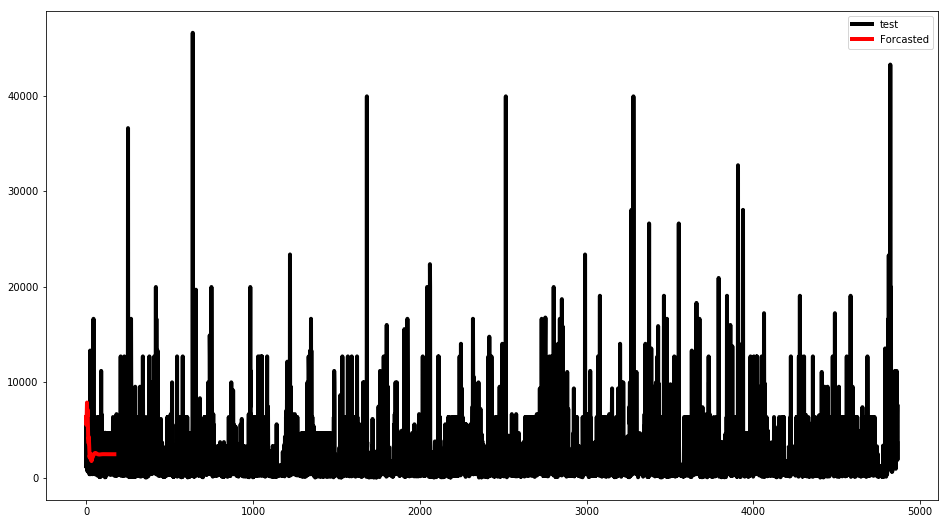

In [28]:
plt.figure(figsize=(16,9))
plt.plot(Ytest , 'black', linewidth=4)
plt.plot(forcasted_output_cnn,'r' , linewidth=4)
plt.legend(('test','Forcasted'))
plt.show()